
# Predicting Newsletter Subscription from Minecraft Player Data

**Course**: DSCI 100  
**Author**: Er Zhou  

## Introduction

This report follows the complete data science workflow from *Data Science: A First Introduction* (Chapters 1–11). The objective is to build a model that predicts whether a player in a Minecraft research server subscribes to a game-related newsletter, using only variables from `players.csv`.

The analysis incorporates data wrangling, visualization, modeling (with K-nearest neighbors), and evaluation through metrics and inference testing.


## Question

**Can we predict whether a player subscribes to the newsletter using demographic and behavioral features from `players.csv`?**

We treat `subscribe` as the response variable and consider these predictors:
- `experience`: categorical player experience level
- `gender`: categorical
- `age`: numeric
- `played_hours`: numeric self-reported hours played


In [54]:

library(tidyverse)
library(readr)
library(dplyr)
library(ggplot2)
library(broom)
library(infer)
library(forcats)
library(tidyr)


## Data Wrangling

We load and clean `players.csv`, convert appropriate variables to factors, and drop missing `age` entries.

In [55]:
players <- read_csv("Data/players.csv")

players <- players %>%
  mutate(
    subscribe = as.factor(subscribe),
    experience = as.factor(experience),
    gender = as.factor(gender)
  ) %>%
  drop_na(Age)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Data Description 
We inspect the data structure and summarize key numeric features.


In [56]:
head(players)
summary(select(players, Age, played_hours))

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


      Age         played_hours    
 Min.   : 8.00   Min.   :  0.000  
 1st Qu.:17.00   1st Qu.:  0.000  
 Median :19.00   Median :  0.100  
 Mean   :20.52   Mean   :  5.905  
 3rd Qu.:22.00   3rd Qu.:  0.600  
 Max.   :50.00   Max.   :223.100  

## Exploratory Data Analysis (Chapter 3)

We explore how subscription status relates to experience, gender, and hours played.


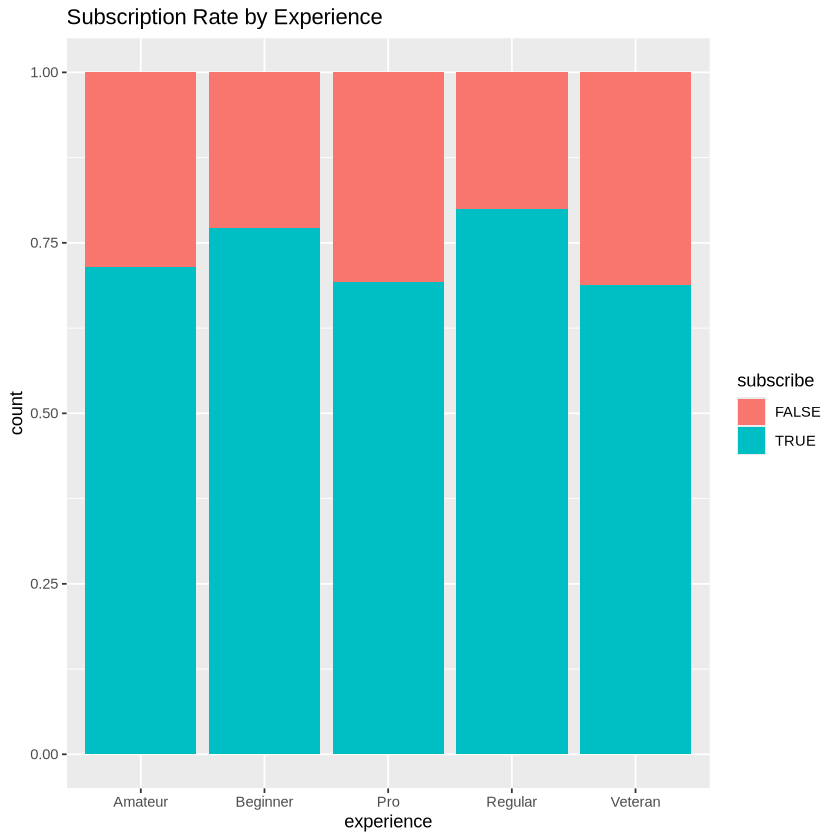

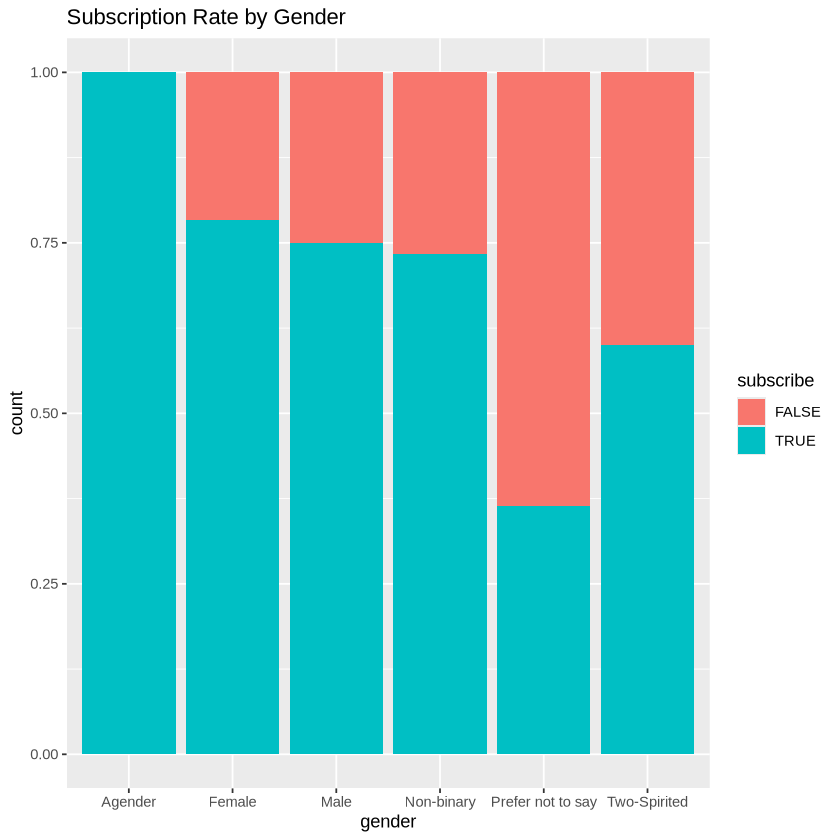

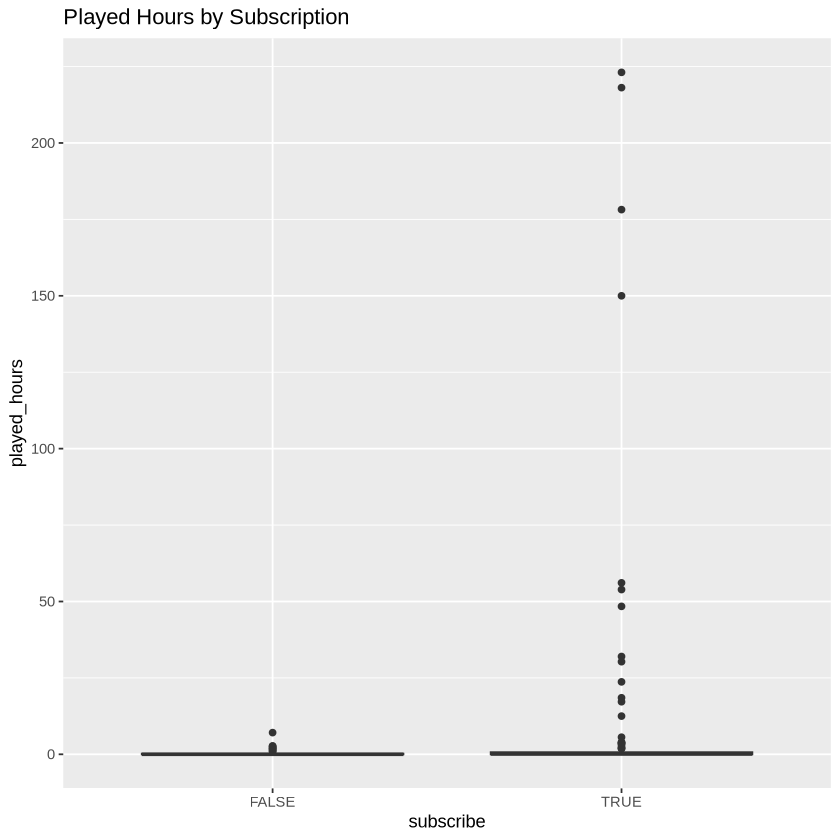

In [57]:
# Experience vs subscribe
ggplot(players, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "fill") +
  labs(title = "Subscription Rate by Experience")

# Gender vs subscribe
ggplot(players, aes(x = gender, fill = subscribe)) +
  geom_bar(position = "fill") +
  labs(title = "Subscription Rate by Gender")

# Played hours vs subscribe
ggplot(players, aes(x = subscribe, y = played_hours)) +
  geom_boxplot() +
  labs(title = "Played Hours by Subscription")